In [1]:
# Install Kaggle API
!pip install kaggle

# Create a Kaggle directory to store the API key
!mkdir ~/.kaggle



# Move the kaggle.json file to the .kaggle folder
!mv kaggle.json ~/.kaggle/

# Set permissions to the file
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
# Download the dataset (replace the dataset link with the IMDb dataset you're using)
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Unzip the dataset
!unzip /content/imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the movies metadata dataset
movies_df = pd.read_csv('/content/IMDB Dataset.csv')

# Display the first few rows of the dataset
movies_df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Display column names
movies_df.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
# Check the structure of the dataset
movies_df.info()

# Summary statistics for the dataset
movies_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


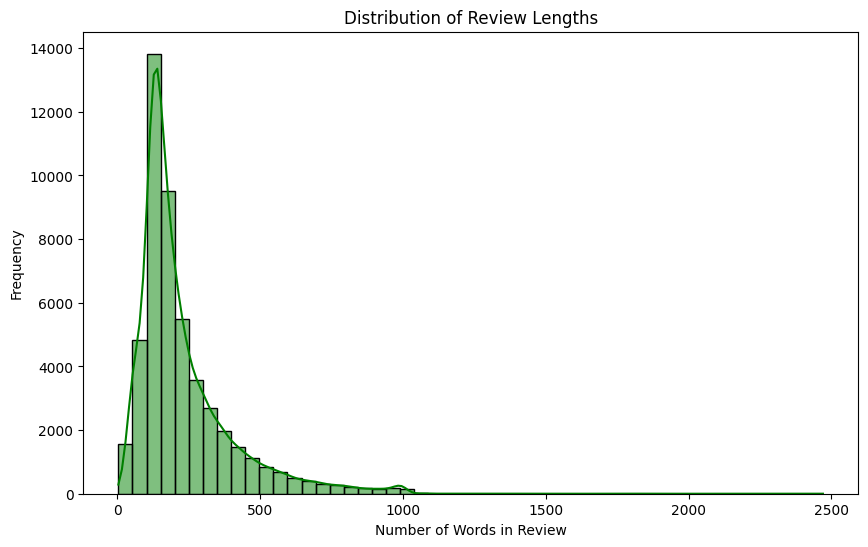

In [12]:
# Calculate the length of each review (in words)
movies_df['review_length'] = movies_df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['review_length'], bins=50, kde=True, color='green')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()


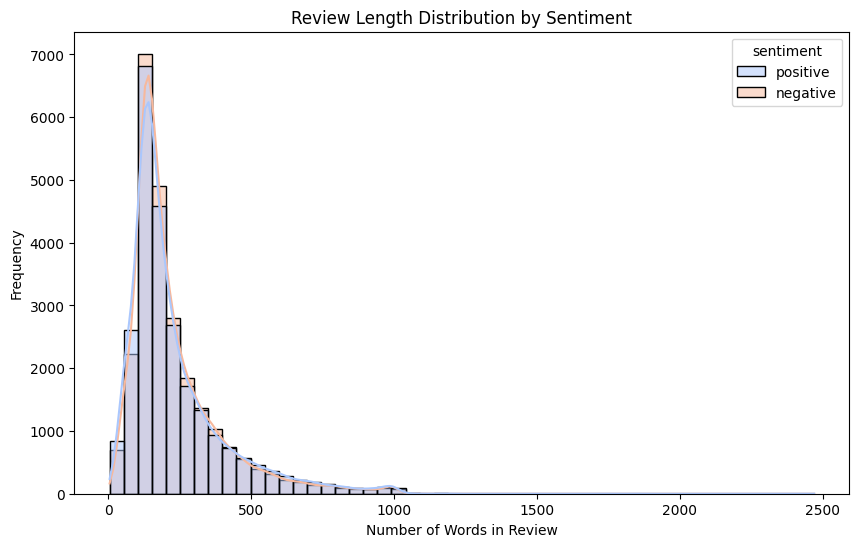

In [14]:
# Plot the distribution of review lengths for each sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='review_length', hue='sentiment', bins=50, kde=True, palette='coolwarm')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()


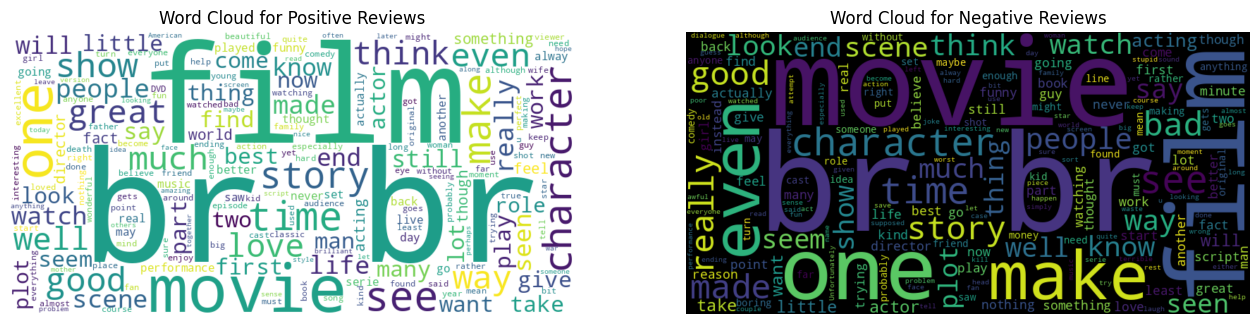

In [16]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = ' '.join(movies_df[movies_df['sentiment'] == 'positive']['review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = ' '.join(movies_df[movies_df['sentiment'] == 'negative']['review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


<ipython-input-18-3e9fec50321b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies_df, x='sentiment', palette='coolwarm')


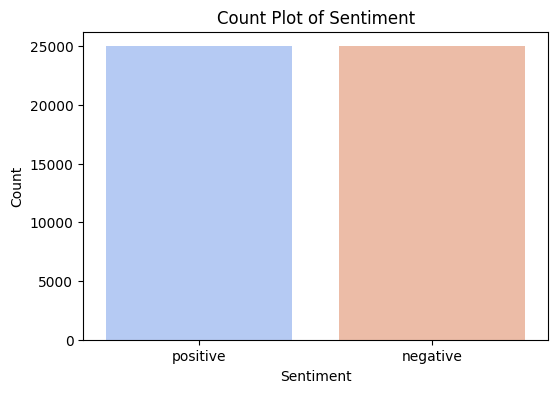

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(6, 4))

# Create the count plot for the 'sentiment' column
sns.countplot(data=movies_df, x='sentiment', palette='coolwarm')

# Add title and labels
plt.title('Count Plot of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()
